<a href="https://colab.research.google.com/github/fidanismayilzada23/ML-Projects/blob/main/Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amaç: Konut fiyatını sosyo-ekonomik ve çevresel değişkenlere göre tahmin etmek.

In [28]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
import pandas as pd
df=pd.read_csv('/content/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Data Description

In [30]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Variables in order:

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per 10,000 dollars

PTRATIO pupil-teacher ratio by town

B = "1000(Bk - 0.63)^2" where Bk is the proportion of blacks by town

LSTAT percentage lower status of the population

MEDV Median value of owner-occupied homes in $1000's

In [31]:
df.shape

(506, 14)

In [32]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [33]:
df.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


In [34]:
df.nunique()

,0
crim,504
zn,26
indus,76
chas,2
nox,81
rm,441
age,356
dis,412
rad,9
tax,66


Missing Values Summary

In [35]:
df["rm"].fillna(df["rm"].median(), inplace=True)

/tmp/ipython-input-1825309349.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["rm"].fillna(df["rm"].median(), inplace=True)


In [36]:
df.isna().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [37]:
df[df.isna().any(axis=1)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv


Descriptive Statistics

In [38]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283587,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702126,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Box Plots

<Axes: ylabel='medv'>

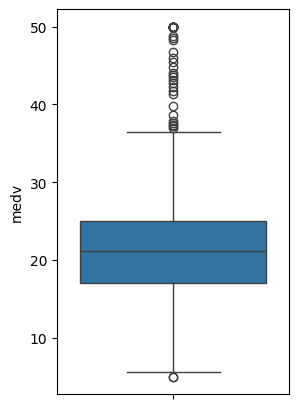

In [41]:
#median box plot
plt.figure(figsize=(3,5))
sns.boxplot(y="medv",data=df)

<Axes: ylabel='crim'>

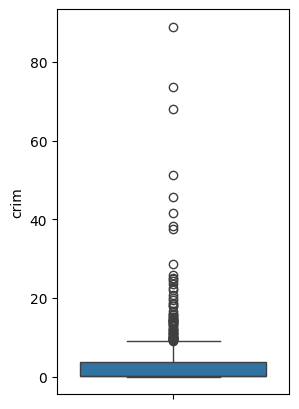

In [42]:
#crime box plot
plt.figure(figsize=(3,5))
sns.boxplot(y="crim",data=df)

<Axes: ylabel='nox'>

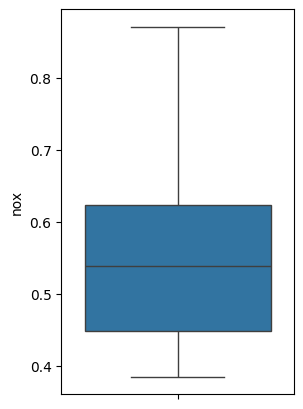

In [43]:
#nitrit oksid boxplot
plt.figure(figsize=(3,5))
sns.boxplot(y="nox", data=df)

<Axes: ylabel='tax'>

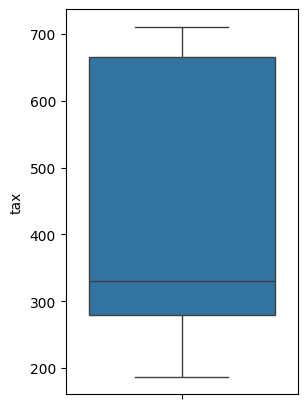

In [44]:
#tax boxplot
plt.figure(figsize=(3,5))
sns.boxplot(y="tax",data=df)

Price Scatter Graphs

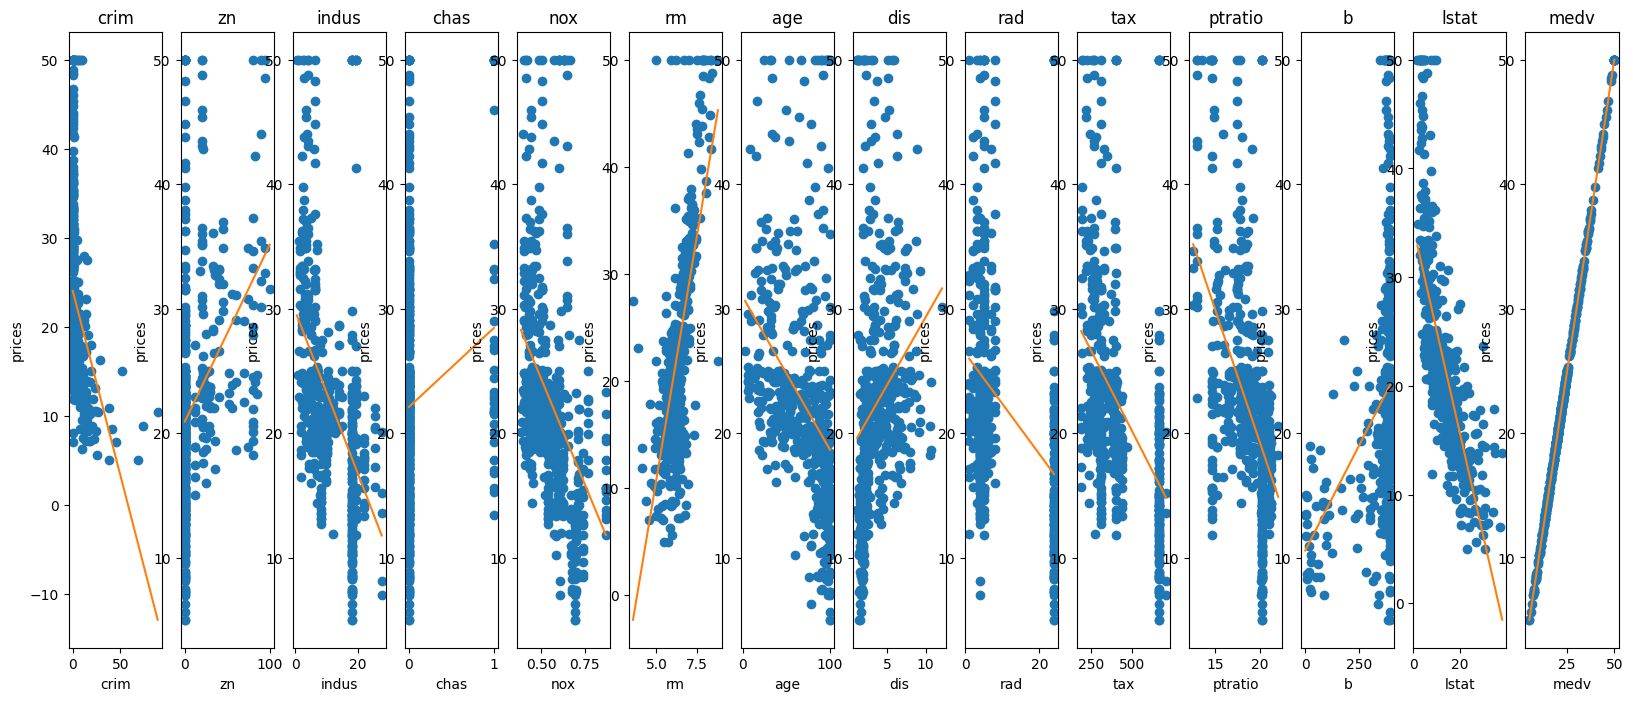

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))

for i, col in enumerate(df.columns):
  plt.subplot(1,14,i+1)
  x= df[col]
  y=df['medv']
  plt.plot(x,y,'o')

  plt.plot(np.unique(x),np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('prices')

Correlation Matrix

In [52]:
corr=df.corr()
corr.shape

(14, 14)

<Axes: >

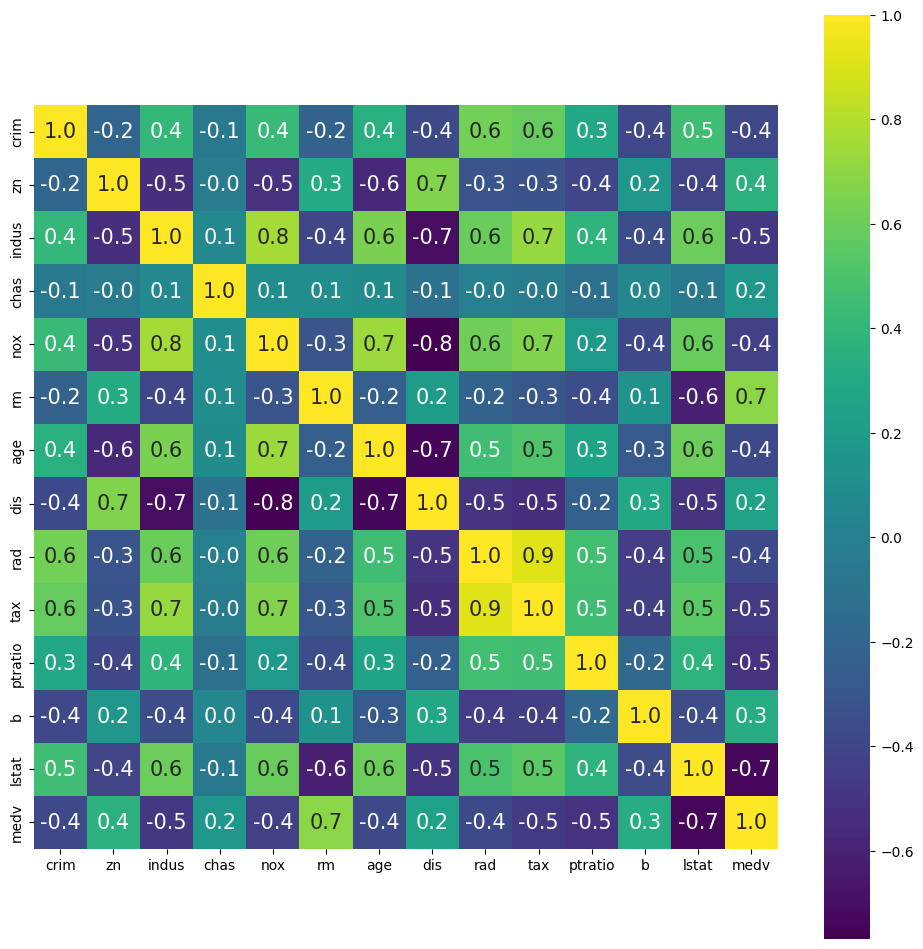

In [71]:
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':15},cmap='viridis')

Linear Regression Uning Sklearn

In [73]:
X= df.drop('medv',axis=1)
y=df['medv']

In [75]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(X,y)

LinearRegression()

In [76]:
#Tüm değişkenler 0 olduğunda ev fiyatı ortalama bu kadar olur
lm.intercept_

np.float64(36.469734292829024)

In [78]:
# Bu ise bir değişkenin evin fiyatlarına nasıl etki etdiğini ölçer. yeni meselen taxın artması ile qiymet arasında ters elaqe var
coeffcients=pd.DataFrame([X.columns,lm.coef_]).T
coeffcients= coeffcients.rename(columns={0:'Attribute',1:'Coefficients'})
coeffcients

,Attribute,Coefficients
0,crim,-0.10809
1,zn,0.046393
2,indus,0.021983
3,chas,2.684377
4,nox,-17.72313
5,rm,3.797127
6,age,0.001053
7,dis,-1.463262
8,rad,0.307699
9,tax,-0.012428


Linear Regression Repeated for Train and Test

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [81]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [82]:
lm.intercept_

np.float64(36.38521799882469)

Co-efficients for Training model

In [83]:
coeffcients=pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients= coeffcients.rename(columns={0:'Attribute',1:'Coefficients'})
coeffcients

,Attribute,Coefficients
0,crim,-0.122606
1,zn,0.055689
2,indus,-0.007705
3,chas,4.696113
4,nox,-14.442806
5,rm,3.273715
6,age,-0.003182
7,dis,-1.546939
8,rad,0.326069
9,tax,-0.01406


Model Evaluation for OLS on training Data/
Modelin öğrenmesini ölçelim

In [84]:
y_pred=lm.predict(X_train)

In [85]:
#Modelin gelişimi
#Model ne kadar açıklayıcı? (R^2) 74 faizini öğrenmiş
print('R^2:',metrics.r2_score(y_train,y_pred))
#Değişkenler gerçekten işe yarıyor mu? tahmini ortalamada 3.09 sapıyor
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
#Ortalama ne kadar yanılıyoruz?
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
#Hataların karesini alır
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
#Büyük hatalar var mı? tahmini 4.37 hata veriyor
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.7462719837410952
Adjusted R^2: 0.7365706184135488
MAE: 3.091780076700237
MSE: 19.098318292456703
RMSE: 4.370162273011919


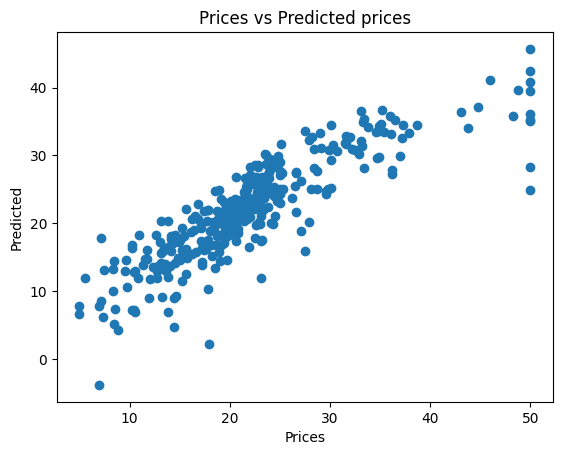

In [86]:
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted')
plt.title('Prices vs Predicted prices')
plt.show()

Inspecting the Residuals

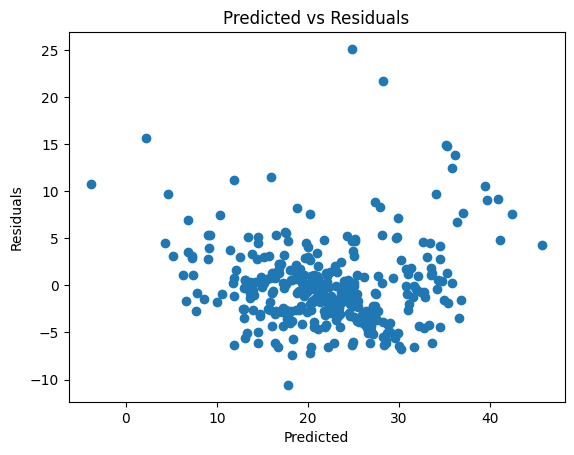

In [87]:
#modelin öğrenemsi ile hata arasındakı uyumu. Yani model doğru bir varsayım yapıyormu

plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

/tmp/ipython-input-2763557146.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_pred)


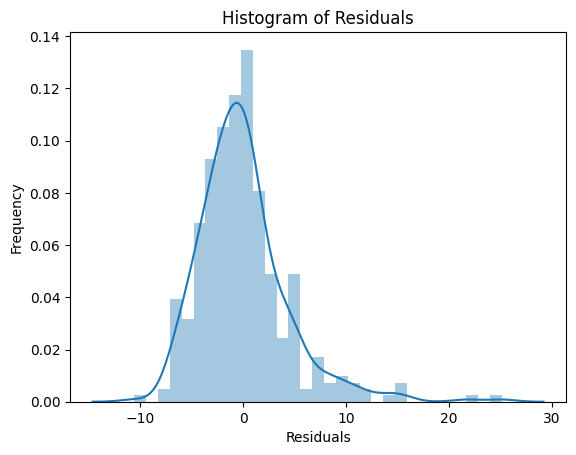

In [89]:
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show();

Model evaluation for OLS on test Data

In [90]:
#Bu ise modelin gerçek hayatdakı performansını ölçüyor
#yani şimdi yaptığımız hiç görmediği evler için fiyat tahminlemesi yapıyor
y_test_pred=lm.predict(X_test)

In [91]:
#Model gelişimi
acc_linreg=metrics.r2_score(y_test,y_test_pred)
#r kvadratı trainde de yüksek testdede yüksek çıxarsa model iyi öğrenmiştir eğer trainde yüksek testde düşük çıxarsa overfitting yapmıştır
print('R^2:',acc_linreg)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test,y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


R^2: 0.7112960013828398
Adjusted R^2: 0.6840992478899188
MAE: 3.870487158407588
MSE: 30.146492403664716
RMSE: 5.490582155260471


Random Forest Regressor

In [94]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [95]:
y_pred=reg.predict(X_train)

In [96]:
print('R^2:',metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.9781647133234117
Adjusted R^2: 0.9773298347151892
MAE: 0.83004802259887
MSE: 1.643560144067797
RMSE: 1.2820140966728084


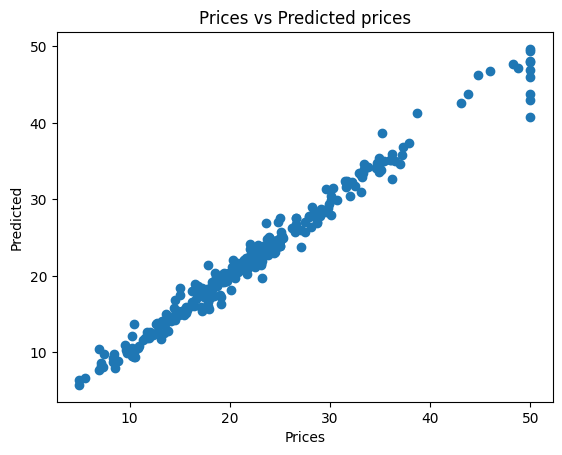

In [97]:
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted')
plt.title('Prices vs Predicted prices')
plt.show()

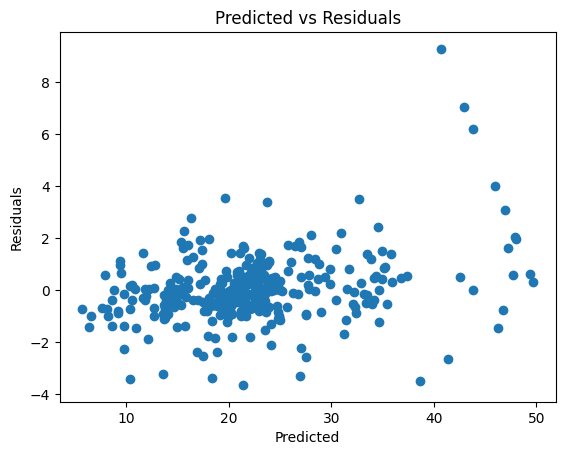

In [98]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [99]:
y_test_pred=reg.predict(X_test)

In [100]:
acc_rf=metrics.r2_score(y_test,y_test_pred)
print('R^2:',acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8286281511050668
Adjusted R^2: 0.8124844262091673
MAE: 2.5541513157894733
MSE: 17.894660848684214
RMSE: 4.230208133021851
